In [2]:
import time

import numpy as np
import seaborn as sns
from pytdigest import TDigest

from tdrust import Digest

In [3]:
digest = Digest(delta=100.)

In [4]:
! pip install numpy seaborn pytdigest

In [5]:
arr = np.random.normal(size=10_000_000)

In [6]:
start = time.time()
digest.append(arr, weight=1.0)
end = time.time()

print(f'{end - start:.3g} seconds')

digest.merge()


15.3 seconds


In [7]:
start = time.time()
cdfs = digest.cdfs(arr)
end = time.time()

print(f'{end - start:.3g} seconds')

1.84 seconds


In [8]:
cdfs

array([0.99587904, 0.63266302, 0.46616105, ..., 0.7855178 , 0.98267955,
       0.13845886])

<Axes: >

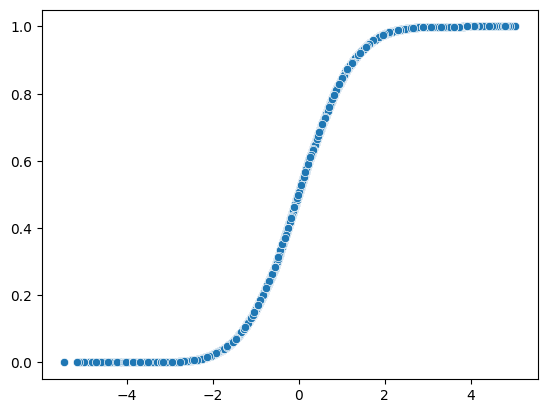

In [7]:
sns.scatterplot(y=cdfs, x=arr)

In [8]:
start = time.time()
td = TDigest.compute(arr)
end = time.time()

print(f'{end - start:.3g} seconds')

0.811 seconds


In [9]:
start = time.time()
cdfs = td.cdf(arr)
end = time.time()

print(f'{end - start:.3g} seconds')

0.268 seconds


<Axes: >

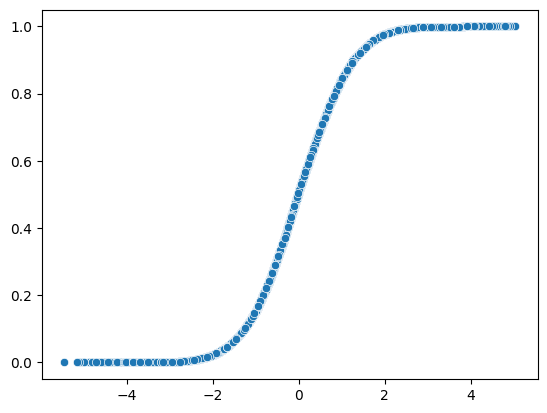

In [10]:
sns.scatterplot(y=np.array(cdfs), x=arr)